### Group Project - Tree models: Decision tree, Bagging decision

In [3]:
# Data cleaning and EDA modules

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# from sklearn.tree import export_graphviz  


# Estimation model modules

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import  SVR                            # support vector machine


# Model validation modules

from sklearn.model_selection import train_test_split


# model metrics modules

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error 

#Pipeline and grid search modules

from sklearn.model_selection import GridSearchCV


print('finished importing modules')

finished importing modules


In [4]:
df = pd.read_csv('../../timmy-data/loans_cleaned.csv')

In [5]:
df.head(5)

,loan_id,status,posted_time,raised_time,loan_amount,activity_name,sector_name,country_name,lender_term,repayment_interval,borrower_genders,time_to_fund,hours_to_fund,loan_year,day_posted,image_incl,video_incl
0,1344750,funded,2017-07-22 02:01:05+00:00,2017-08-02 04:07:12+00:00,200.0,Pigs,Agriculture,Philippines,14.0,monthly,F,11 days 02:06:07,267,2017,Saturday,1,0
1,263082,funded,2011-01-05 02:43:16+00:00,2011-01-06 19:55:59+00:00,900.0,Food Production/Sales,Food,El Salvador,26.0,monthly,G,1 days 17:12:43,42,2011,Wednesday,0,0
2,242359,funded,2010-10-25 09:14:01+00:00,2010-10-27 02:01:55+00:00,475.0,General Store,Retail,Philippines,8.0,monthly,F,1 days 16:47:54,41,2010,Monday,1,0
3,1818722,funded,2019-08-19 06:33:01+00:00,2019-08-21 14:50:42+00:00,350.0,Food Production/Sales,Food,Philippines,8.0,monthly,F,2 days 08:17:41,57,2019,Monday,1,0
4,1413547,funded,2017-11-10 16:08:54+00:00,2017-11-12 20:15:33+00:00,325.0,Food Market,Food,Liberia,6.0,monthly,F,2 days 04:06:39,53,2017,Friday,1,0


In [6]:
df.isnull().sum()

loan_id               0
status                0
posted_time           0
raised_time           0
loan_amount           0
activity_name         0
sector_name           0
country_name          0
lender_term           0
repayment_interval    0
borrower_genders      0
time_to_fund          0
hours_to_fund         0
loan_year             0
day_posted            0
image_incl            0
video_incl            0
dtype: int64

### Log transform loan amount and hours to fund

In [7]:
df['log_amount'] = np.log(df['loan_amount'])
df['log_htf'] = np.log(df['hours_to_fund'])
df.isnull().sum()

loan_id               0
status                0
posted_time           0
raised_time           0
loan_amount           0
activity_name         0
sector_name           0
country_name          0
lender_term           0
repayment_interval    0
borrower_genders      0
time_to_fund          0
hours_to_fund         0
loan_year             0
day_posted            0
image_incl            0
video_incl            0
log_amount            0
log_htf               0
dtype: int64

### Dummify categorical variables - activity, country, and gender

In [8]:
df = pd.get_dummies(columns=["activity_name"], drop_first=True, data=df)
df = pd.get_dummies(columns=["country_name"], drop_first=True, data=df)
df = pd.get_dummies(columns=['borrower_genders'], drop_first=True, data=df)

In [9]:
df_1=df.drop(columns=['image_incl', 'video_incl', 'sector_name', 'loan_id', 'status', 'day_posted',
                      'posted_time', 'raised_time', 'image_incl', 'video_incl', 'lender_term', 'repayment_interval']).copy()

In [10]:
df_1.shape
features=df_1.columns
features

Index(['loan_amount', 'time_to_fund', 'hours_to_fund', 'loan_year',
       'log_amount', 'log_htf', 'activity_name_Agriculture',
       'activity_name_Air Conditioning', 'activity_name_Animal Sales',
       'activity_name_Aquaculture',
       ...
       'country_name_Turkey', 'country_name_Uganda', 'country_name_Ukraine',
       'country_name_United States', 'country_name_Vietnam',
       'country_name_Yemen', 'country_name_Zambia', 'country_name_Zimbabwe',
       'borrower_genders_G', 'borrower_genders_M'],
      dtype='object', length=257)

### Produce files comprising yearly data files and all loan transactions based on loan amount threshhold

### Identify loan threshhold

In [11]:
loan_threshhold=1000

In [12]:
df_2015=df[df_1.loan_year==2015]
df_2016=df[df_1.loan_year==2016]
df_2017=df[df_1.loan_year==2017]
df_2018=df[df_1.loan_year==2018]
df_2019=df_1[(df_1.loan_year>=2019) & (df_1.loan_amount<=loan_threshhold)]
df_all=df_1[df_1.loan_amount<=loan_threshhold]

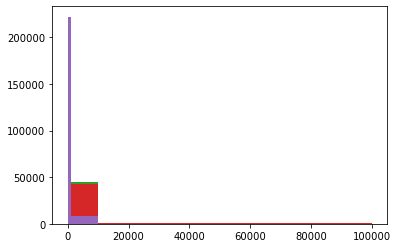

In [13]:
bin_count = 1, 10, 100,1000,10000,100000


# plt.hist(df['loan_amount'], bins=50);
plt.hist(df_2015['loan_amount'], bins=bin_count);
plt.hist(df_2016['loan_amount'], bins=bin_count);
plt.hist(df_2017['loan_amount'], bins=bin_count);
plt.hist(df_2018['loan_amount'], bins=bin_count);
plt.hist(df_2019['loan_amount'], bins=bin_count);

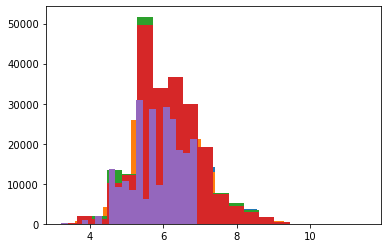

In [14]:
bin_count = 20


# plt.hist(df['loan_amount'], bins=50);
# plt.hist(df_1['log_amount'], bins=bin_count);
plt.hist(df_2015['log_amount'], bins=bin_count);
plt.hist(df_2016['log_amount'], bins=bin_count);
plt.hist(df_2017['log_amount'], bins=bin_count);
plt.hist(df_2018['log_amount'], bins=bin_count);
plt.hist(df_2019['log_amount'], bins=bin_count);

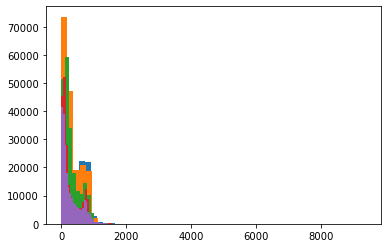

In [15]:
bin_count = 50

plt.hist(df_2015['hours_to_fund'], bins=bin_count);
plt.hist(df_2016['hours_to_fund'], bins=bin_count);
plt.hist(df_2017['hours_to_fund'], bins=bin_count);
plt.hist(df_2018['hours_to_fund'], bins=bin_count);
plt.hist(df_2019['hours_to_fund'], bins=bin_count);


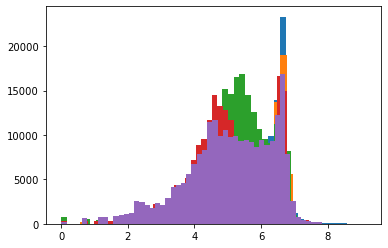

In [16]:
bin_count = 50


plt.hist(df_2015['log_htf'], bins=bin_count);
plt.hist(df_2016['log_htf'], bins=bin_count);
plt.hist(df_2017['log_htf'], bins=bin_count);
plt.hist(df_2018['log_htf'], bins=bin_count);
plt.hist(df_2019['log_htf'], bins=bin_count);

In [17]:
df_2=df_1.drop(columns=['time_to_fund', 'log_htf', 'hours_to_fund', 'loan_year',]).copy()
features = df_2.columns 
features

Index(['loan_amount', 'log_amount', 'activity_name_Agriculture',
       'activity_name_Air Conditioning', 'activity_name_Animal Sales',
       'activity_name_Aquaculture', 'activity_name_Arts',
       'activity_name_Auto Repair', 'activity_name_Bakery',
       'activity_name_Balut-Making',
       ...
       'country_name_Turkey', 'country_name_Uganda', 'country_name_Ukraine',
       'country_name_United States', 'country_name_Vietnam',
       'country_name_Yemen', 'country_name_Zambia', 'country_name_Zimbabwe',
       'borrower_genders_G', 'borrower_genders_M'],
      dtype='object', length=253)

In [18]:
feature_cypher=df_2.isnull().sum()

feature_cypher.to_excel("feature_cypher.xlsx") 
# print(feature_cypher)

### Identify time period

In [19]:
df=df_all

In [20]:
X = df[features]
y = df['log_htf']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
X.head()

,loan_amount,log_amount,activity_name_Agriculture,activity_name_Air Conditioning,activity_name_Animal Sales,activity_name_Aquaculture,activity_name_Arts,activity_name_Auto Repair,activity_name_Bakery,activity_name_Balut-Making,...,country_name_Turkey,country_name_Uganda,country_name_Ukraine,country_name_United States,country_name_Vietnam,country_name_Yemen,country_name_Zambia,country_name_Zimbabwe,borrower_genders_G,borrower_genders_M
0,200.0,5.298317,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,900.0,6.802395,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,475.0,6.163315,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,350.0,5.857933,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,325.0,5.783825,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Decision tree model
#### https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

In [23]:
# param_grid = {
#                  'max_depth': [2, 16, 32, 64],
#               'min_samples_split': [5, 10, 15, 20],
#               'min_samples_leaf': [2, 3, 4, 5, 6],
#               'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10]},

DT_hyper_params = {
                   'max_depth': [None],
                   'min_samples_leaf': [2, 8, 16],
#                    'min_samples_split': [2, 4, 8],
                   'ccp_alpha': [0, .001]},



In [24]:
regressor = DecisionTreeRegressor(random_state = 42)  

In [25]:
d_tree_grid = GridSearchCV(estimator = regressor,
                           param_grid = DT_hyper_params,
                           cv = 5,
                           n_jobs = 6,
                           verbose = 1)

import time

# Start our timer.
t0 = time.time()

# Let's GridSearch over the above parameters on our training data.
%time d_tree_grid.fit(X_train, y_train)

# Stop our timer and print the result.
print(time.time() - t0)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  9.6min finished


Wall time: 10min 52s
652.3372507095337


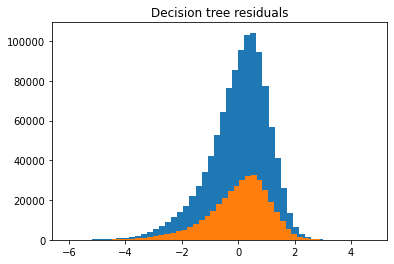

In [26]:
#Produce Decision Tree predictions and model scores

y_train_preds = d_tree_grid.predict(X_train)
resids = y_train - y_train_preds
plt.hist(resids, bins=50);
decision_tree_train_mse = mean_squared_error(np.exp(y_train), np.exp(y_train_preds))
decision_tree_train_rmse = np.sqrt(decision_tree_train_mse)

y_test_preds = d_tree_grid.predict(X_test)
resids = y_test - y_test_preds

plt.hist(resids, bins=50);
decision_tree_test_mse = mean_squared_error(np.exp(y_test), np.exp(y_test_preds))
decision_tree_test_rmse = np.sqrt(decision_tree_test_mse)

plt.title('Decision tree residuals')

DT_best_score=d_tree_grid.best_score_
DT_test_score=d_tree_grid.score(X_test, y_test)



In [27]:
print('DT_best params: ', d_tree_grid.best_params_)
print('DT best train score: ', DT_best_score)
print('DT test score: ', DT_test_score)
print('DT train rmse: ', decision_tree_train_rmse)
print('DT test rmse: ', decision_tree_test_rmse)

DT_best params:  {'ccp_alpha': 0, 'max_depth': None, 'min_samples_leaf': 16}
DT best train score:  0.22545179815651623
DT test score:  0.22771993291043013
DT train rmse:  276.11385351393443
DT test rmse:  280.3146779529371


In [28]:
# https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

# # arange for creating a range of values  
# # from min value of X to max value of X  
# # with a difference of 0.01 between two 
# # consecutive values 
# X_grid = np.arange(min(X), max(X), 0.01) 
  
# # reshape for reshaping the data into  
# # a len(X_grid)*1 array, i.e. to make 
# # a column out of the X_grid values 
# X_grid = X_grid.reshape((len(X_grid), 1))  
  
# # scatter plot for original data 
# plt.scatter(X, y, color = 'red') 
  
# # plot predicted data 
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')  
  
# # specify title 
# plt.title('Profit to Production Cost (Decision Tree Regression)')  
  
# # specify X axis label 
# plt.xlabel('Production Cost') 
  
# # specify Y axis label 
# plt.ylabel('Profit') 
  
# # show the plot 
# plt.show() 

In [29]:
# # Import plot_tree from sklearn.tree module.
# from sklearn.tree import plot_tree

# # Establish size of figure.
# plt.figure(figsize = (50, 30))

# Plot our tree.
# plot_tree(d_tree_grid.best_estimator_,
#           feature_names = X_train.columns,
#           filled = True);

In [30]:
# # create a regressor object 
# regressor = DecisionTreeRegressor(ccp_alpha=0, max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state = 42)  
  
# # fit the regressor with X and Y data 
# regressor.fit(X, y) 

DecisionTreeRegressor(ccp_alpha=0, max_depth=7, min_samples_leaf=2,
                      min_samples_split=5, random_state=42)

In [31]:
# https://stackoverflow.com/questions/41942109/plotting-the-digraph-with-graphviz-in-python-from-dot-file/41942937

# from sklearn.tree import export_graphviz

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#examples-using-sklearn-tree-plot-tree

# tree.plot_tree(regressor)



### Bagging decision tree model

In [21]:
Bagging_DT_hyper_params = {
#                             'max_depth': [8, 16, 32],
#                             'max_depth': [20],    
                            'max_features': [200],
                            'max_samples': [0.5, 1.0],
#                             'min_samples_leaf': [2, 8, 16],
#                             'min_samples_split': [2, 4, 8]
#                           'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
#                           'bootstrap_features': [True, False]
                                 }

In [22]:
import time

# Start our timer.
t0 = time.time()


Bagging_DT_grid = GridSearchCV(estimator = BaggingRegressor(),
                    param_grid = Bagging_DT_hyper_params,
                    n_jobs = 6,                               
                    cv = 5,
                    verbose = 1)

import time

# Start our timer.
t0 = time.time()

# Let's GridSearch over the above parameters on our training data.
%time Bagging_DT_grid.fit(X_train, y_train)

# Stop our timer and print the result.
print(time.time() - t0)

Bagging_DT_grid.fit(X_train, y_train)

# Stop our timer and print the result.
print(time.time() - t0)



Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed: 21.8min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed: 21.8min finished


Wall time: 28min 2s
1682.4035761356354
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed: 18.2min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed: 18.2min finished


3066.1118030548096


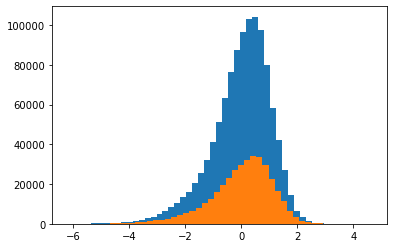

In [23]:
y_train_preds = Bagging_DT_grid.predict(X_train)
resids = y_train - y_train_preds
plt.hist(resids, bins=50);
bagged_decision_tree_train_mse = mean_squared_error(np.exp(y_train), np.exp(y_train_preds))
bagged_decision_tree_train_rmse = np.sqrt(bagged_decision_tree_train_mse) 

y_test_preds = Bagging_DT_grid.predict(X_test)
resids = y_test - y_test_preds
plt.hist(resids, bins=50);
bagged_decision_tree_test_mse = mean_squared_error(np.exp(y_test), np.exp(y_test_preds))
bagged_decision_tree_test_rmse = np.sqrt(bagged_decision_tree_test_mse)




In [24]:
print('Bagging DT best params: ', Bagging_DT_grid.best_params_)
print('Bagging DT best score: ', Bagging_DT_grid.best_score_)
print('Bagging DT test score: ', Bagging_DT_grid.score(X_test, y_test))
print('Bagging DT train rmse: ', bagged_decision_tree_train_rmse)
print('Bagging DT  test rmse: ', bagged_decision_tree_test_rmse)

Bagging DT best params:  {'max_features': 200, 'max_samples': 0.5}
Bagging DT best score:  0.22044972281560296
Bagging DT test score:  0.22203188983343747
Bagging DT train rmse:  273.48437026357914
Bagging DT  test rmse:  282.411559002235
